<a href="https://colab.research.google.com/github/snaby/project3/blob/master/project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import cell
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Show that the $k^\mathrm{th}$ running averages satisfy the following identity:
\begin{align}
    \langle O\rangle_{k+1} = \langle O\rangle_k + \frac{1}{k+1}(o_{k+1} - \langle O\rangle_k).
\end{align}

The $k^\mathrm{th}$ running average is defined as follows:
\begin{align}
    \langle O \rangle_k = \frac{o_1 + o_2 + \cdots + o_k}{k}.
\end{align}

Therefore, the updated $k^{th}$ running average with $o_{k+1}$ is:
\begin{align}
\langle O\rangle_{k+1} &= \frac{o_{k+1} + k \cdot \langle O\rangle_k}{k+1}\\
&=\frac{o_{k+1} + k \cdot \ \langle O\rangle_k + \langle O\rangle_k -\langle O\rangle_k}{k+1}\\
&=\frac {(k+1)\langle O\rangle_k + o_{k+1} - \langle O\rangle_k}{k+1}\\
\langle O\rangle_{k+1} &= \langle O\rangle_k + \frac{1}{k+1}(o_{k+1} - \langle O\rangle_k) \,\ Q.E.D.
\end{align}

# Python Functions for Simulating a Biased Coin via Metropolis MCMC

In [ ]:
def weighted_coin(beta, n, display_graph=False):
  """ Solves for the average value of a weighted coin using the Metropolis MCMC simulation 

  Args:
      beta(float): probability of the coin landing on heads
      n(positive int): total number of coin flips

  Kwargs:
      display_graph: whether or not to display the graph 

  Returns:
      E(float): average earnings per flip 
      Plot: E vs beta 
  """
  current_state = 0
  running_avg = np.zeros(n)
  p = [beta, 1 - beta]
  money = [1, -1]
  for i in range(1, n):
    proposed_state = np.random.choice([0, 1])
    p_accept = np.min([1, p[proposed_state] / p[current_state]])
    r = np.random.uniform(0,1)
    if r <= p_accept: 
      current_state = proposed_state
    running_avg[i] = running_avg[i-1] + (1/(i))*(money[current_state] - running_avg[i-1])
  if(display_graph == True):
    running_avg_100=running_avg[::100] 
    xrange = np.linspace(0, n, len(running_avg_100))
    fig, ax = plt.subplots()
    ax.axhline(average_earnings_per_flip(beta), color = 'b')
    ax.plot(xrange, running_avg_100)
    ax.set_title('Average Earnings Per 100 Flips',fontsize=18)
    ax.set_xlabel('Number of Coin Flips',fontsize=16)
    ax.set_ylabel('Average Earnings ($)',fontsize=16) 
  return running_avg[-1]

def average_earnings_per_flip(beta):
  """ Solves for the average value of a weighted coin exactly

  Args:
      beta(float): probability of the coin landing on heads
  """
  E = beta * (1) + (1-beta) * (-1)
  return E 

# Analytical vs. Numerical Average Earnings for Different Coin Weightings

Text(0, 0.5, 'Average Earnings per Flip ($)')

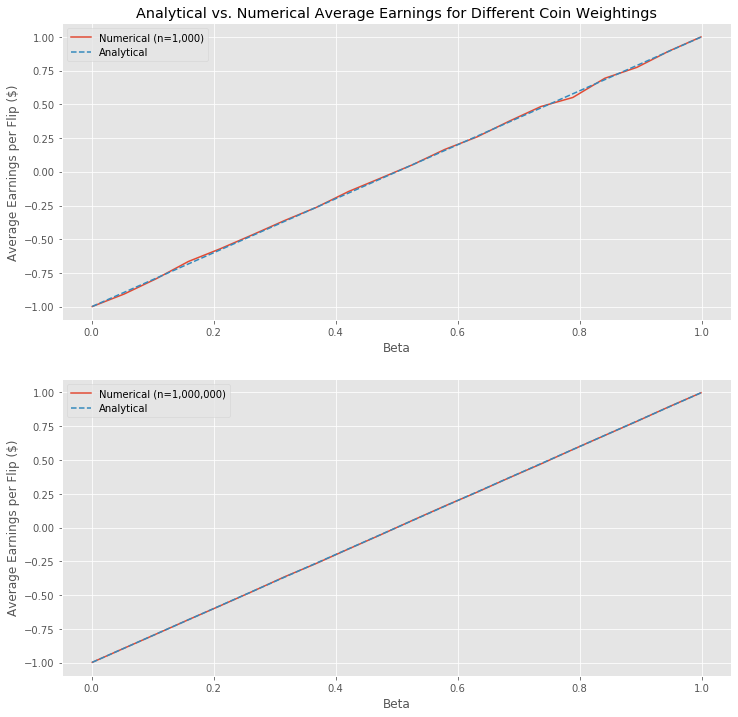

In [ ]:
betarange=np.linspace(0.001,1-0.001,20) #offset beta from zero to avoid dividing by zero
E_theoretical = []
thousandflips = []
millionflips = []
for i in betarange:
  E_theoretical.append(average_earnings_per_flip(i))
  thousandflips.append(weighted_coin(i,10000))
  millionflips.append(weighted_coin(i,1000000))
fig, ax = plt.subplots(2, figsize = (12,12))
ax[0].set_title('Analytical vs. Numerical Average Earnings for Different Coin Weightings')
ax[0].plot(betarange, thousandflips, label = 'Numerical (n=1,000)')
ax[0].plot(betarange, E_theoretical, label = 'Analytical', linestyle = 'dashed')
ax[0].legend(loc = 'upper left')
ax[0].set_xlabel('Beta')
ax[0].set_ylabel('Average Earnings per Flip ($)')
ax[1].plot(betarange, millionflips, label = 'Numerical (n=1,000,000)')
ax[1].plot(betarange, E_theoretical, label = 'Analytical', linestyle = 'dashed')
ax[1].legend(loc = 'upper left')
ax[1].set_xlabel('Beta')
ax[1].set_ylabel('Average Earnings per Flip ($)')

# Code Test for Weighted coin
In the following code, we set `beta`, the probability of the coin landing on heads, to be 0.8 and simulated 100000 coin flips. We did this to check that our approximation of our average earnings using the Metropolis algorithm is very close to our theoretical value of average earnings as calculated from `average_earnings_per_flip`. From the graph below, we can see that by calculating average earnings per 100 flips, our graph is asymptotic to the theoretical value.

Numerical average earnings: 0.5931159311593128
Theoretical average earnings: 0.6000000000000001


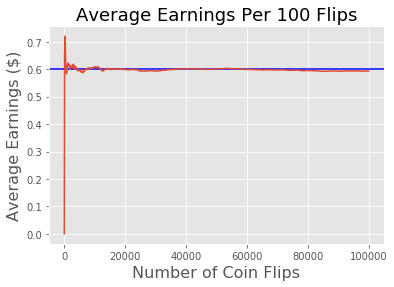

In [ ]:
b = 0.8
p=weighted_coin(b,100000, True)
print('Numerical average earnings:', p)
print('Theoretical average earnings:', average_earnings_per_flip(b))

# Python Function for Simulating a Weighted Die via Metropolis MCMC 

In [ ]:
def weighted_die(n, output_type = 'float'):
  """ Solves for the average value of a weighted die using the Metropolis MCMC simulation 

  Args:
      n(int): the number of times the die is rolled

  Kwargs: 
      output_type(str): outputs the last element (default) or the whole array 

  Returns:
     running_avg: average earnings per flip using Metropolis MCMC simulation 
  """
  current_state = 4
  running_avg = np.zeros(n)
  ratios = [3, 3, 1, 1, 1, 1] #using this as a building block to construct the ratio for acceptance
  money = [1, 1, -1, -1, -1, -1]
 
  for i in range (1, n):
    proposed_state = np.random.choice([0, 1, 2, 3, 4, 5]) 
    p_accept = np.min([1, ratios[proposed_state]/ratios[current_state]])
    r = np.random.uniform(0,1)
    if r <= p_accept: 
      current_state = proposed_state
    running_avg[i] = running_avg[i-1] + (1/(i))*(money[current_state] - running_avg[i-1])
  if output_type == 'float':
    return running_avg[-1]
  if output_type == 'array':
    return running_avg

# N Steps Needed for Average Earning's Convergence to the Nearest $0.01

The following code examines how long it takes for our MCMC code to converge on the earnings per roll for an unfair die. It begins by creating an array that holds the running average earnings at each step in the simulation, and then runs through that array looking for a streak of values all within $0.01 of each other. In this implentation, we consider the value to have converged if a streak is found of length 5000, that is for 5000 rolls the earnings per roll stays within 1 cent. This is done 5 times and the average number of iterations it takes to converge is calculated. These 5 simulations of earning per roll are then plotted with the tolerance band to show that the value has actually settled to within the tolerance.

the average number of iterations to achieve satisfactory convergence is  24670.2 steps


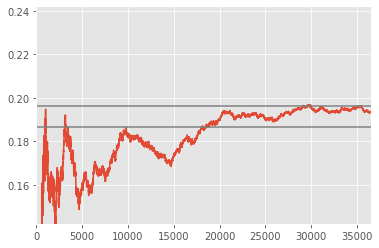

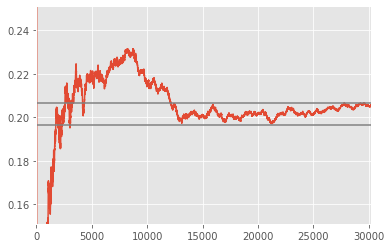

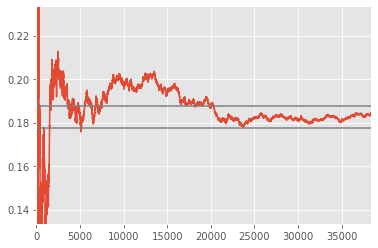

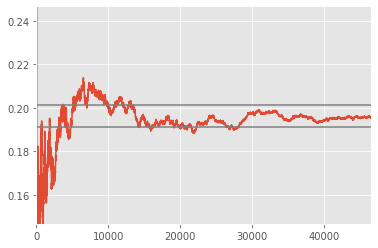

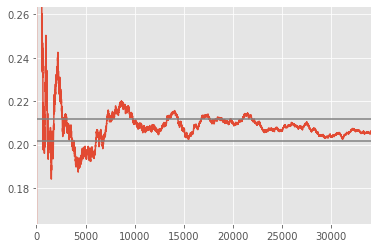

In [ ]:
n = 100000      #number of rolls to simulate using weighted_die
tol = 0.005     #how close the values must be -- within a cent
length = 5000   #how long it needs to be that close
c = 5           #how many times to check convergence to calculate an average #of rolls to converge

Ns = np.array([])
for i in range(c):         #we'll calculate the average number of times it takes to get the average earnings per roll to converge to within a cent
  EpR = weighted_die(n, output_type='array') #EpR is earnings per roll
  diffs = 0
  N = 1
  while diffs < length:        #We'll say that it has convereged if the value has been within a the tolerance for 50 rolls
    if abs(EpR[N] - EpR[N-1]) < tol:
      if diffs == 0:
        run_start = EpR[N-1]
      if abs(run_start - EpR[N]) < tol:
        diffs += 1           #a counter for how long we've been in the tolerance band
      else:
        diffs = 0
    else:
      diffs = 0            #if we leave the tolerance band then we reset this counter   
    N += 1
  Ns = np.append(Ns, N)
  
  figure = plt.figure()
  plt.plot(np.arange(0, n), EpR)
  plt.axhline(EpR[int(N + 0.5 * length)] + tol, color = 'gray')
  plt.axhline(EpR[int(N + 0.5 * length)] - tol, color = 'gray')
  # plt.axvline(conv, color = 'gray')
  # plt.axvline(N + length, color = 'gray')
  plt.xlim(0, N + 2.5*length)
  plt.ylim(EpR[int(N)] - 10*tol, EpR[int(N)] + 10*tol)

conv = np.average(Ns)


#plotting the last weighted_die output zoomed into the region of convergence


print('the average number of iterations to achieve satisfactory convergence is ', conv, 'steps')           #The average number of rolls to converge

# Code Test for Weighted Die
In the following code, I calculated the expectated value of the earnings analytically and compared it to the numerical average earnings calculated using the Metropolis MCMC simulation. 

In [ ]:
print('Numerical average earnings:', weighted_die(100000))
print('Theoretical average earnings:', 6/10 * 1 + 4/10 * (-1))

Numerical average earnings: 0.20273202732027384
Theoretical average earnings: 0.19999999999999996


# Analysis of the 2-d Ising Model
We will explore the physics of the 2-d Ising model on an $N$ = $L \times L$ periodic lattice in the absence of a magnetic field. More specifically, we will explore the behaviors of the mean internal enrgy $U$, magnetization $M$, specific heat $C_H$, and magnetic susceptibility $\chi_T$ (per lattice site) on the temperature defined as

\begin{align}
U& = \frac{1}{N}\langle E\rangle ,& M& = \frac{1}{N}\langle S\rangle ,\\
\chi_T& = \frac{1}{NT}\left(\langle S^2\rangle  - \langle S\rangle^2\right),&
C_H& = \frac{1}{NT^2}\left(\langle E^2\rangle - \langle E\rangle^2\right),
\end{align}

Below, we define a function that implements the Metropolis_Hastings algorithm for the Ising model on a square lattice that allows us to numerically calculate the quanitites above by solving for the averages of $E$, $E^2$, $S$, and $S^2$. 


In [ ]:
def two_dim_ising(L, temp, num_step, H = 0, output_type = 'float', output_spin = False, 
                  spins = np.array(['cool_guy']) ):
  """ 
  Solves for the average E, E^2, S, and S^2 using the Metropolis-Hastings algorithm 
  so that we can calculate U, M, Ch, and Xt later

  Args:
      L(int): length of the lattice
      temp(float): temperature of the lattice
      num_steps(int): number of MCMC updates 
  
  Kwargs:
      H(float): the strength of the applied magnetic field
      output_type(str): tells whether to output the last element or the whole arrays
      output_spin: whether or not to output the spin configuration of the system

  Returns:
      E: net energy 
      E^2: net energy squared 
      S: net magentization
      S^2: net magnetization squared
  """
  # initialize the spins to all up, since the initial state doesnt much matter
  if spins[0] == 'cool_guy':
    spins = np.ones(L**2).reshape(L, L) 

  #setting up the running averages for all these quantities
  E = 0
  S = 0
  E_avg = np.zeros(num_step)
  E2_avg = np.zeros(num_step)
  S_avg = np.zeros(num_step)
  S2_avg = np.zeros(num_step)

  #We'll calculate explicitly these once, then updtae them by calculating del_s and del_e
  for i in range(L):
    for j in range(L):
      #E += -spins[i, j] * (spins[(i+1)%L, j] + spins[(i-1)%L, j] + spins[i, (j+1)%L] 
      #                    + spins[i, (j-1)%L] + H)  #double counting???
      E += -spins[i, j] * (spins[(i+1)%L, j] + spins[i, (j-1)%L] + H)
      S += spins[i, j]
  E_avg[0] = E
  E2_avg[0] = E**2
  S_avg[0] = S
  S2_avg[0] = S**2
  
  ###MCMC Time###
  for n in range(1, num_step):
    #picking a random lattice site    
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)
    #propose flipping one random spin
    prop = -spins[i, j]
    #energy and spin change associated with flipping
    del_E = - 2 * prop * (spins[(i+1)%L, j] + spins[(i-1)%L, j] + spins[i, (j+1)%L] 
                        + spins[i, (j-1)%L] + H)   
    del_S = 2 * prop
    #print('del_E = ', del_E, 'del_S = ', del_S)
    #accepting or rejecting our proposed state
    if del_E <= 0 or np.random.uniform(0, 1) <= np.exp(-del_E/temp):
      spins[i, j] = prop
      E += del_E
      S += del_S
    #calculating the new running average
    E_avg[n] = E_avg[n-1] + (1/(n)) * (E - E_avg[n-1])
    E2_avg[n] = E2_avg[n-1] + (1/(n)) * (E**2 - E2_avg[n-1])
    S_avg[n] = S_avg[n-1] + (1/(n)) * (S - S_avg[n-1])
    S2_avg[n] = S2_avg[n-1] + (1/(n)) * (S**2 - S2_avg[n-1])

  if output_type == 'float':
    if output_spin:
      return E_avg[-1], E2_avg[-1], S_avg[-1], S2_avg[-1], spins
    return E_avg[-1], E2_avg[-1], S_avg[-1], S2_avg[-1]
  
  if output_type == 'array':
    if output_spin:
      return E_avg, E2_avg, S_avg, S2_avg, spins
    return E_avg, E2_avg, S_avg, S2_avg

# Code Test
In order to check that our simulation of the 2-d ising model is actually working we quickly plotted the total energy and total spin as a function of the number of iterations, for a 10x10 lattice at temperature 4. Clearly they seem to be converging based on the plots. The spin goes to zero as expected.

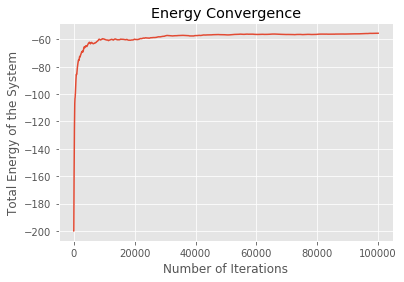

Text(0.5, 0, 'Number of Iterations')

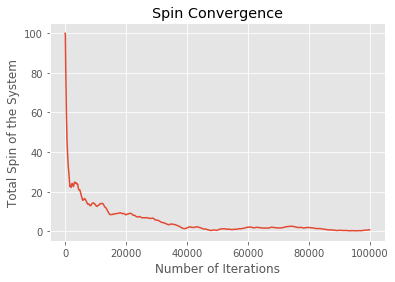

In [ ]:
n = 100000
E, E2, S, S2 = two_dim_ising(10, 4, n, output_type = 'array')
N = np.arange(0, n)
fig, ax = plt.subplots()
plt.plot(N,E)
plt.title('Energy Convergence')
plt.ylabel('Total Energy of the System')
plt.xlabel('Number of Iterations')
plt.show()
plt.plot(N,S)
plt.title('Spin Convergence')
plt.ylabel('Total Spin of the System')
plt.xlabel('Number of Iterations')

# Plot of $U$ and $M$ as functions of $t$ for $L = 16, 32$
To moniter the convergence of values in our MCMC algorithm, we introduce the parameter $t = \frac{n}{L^2}$ with n being the number of steps to perform the MCMC for. The following code cell examines the convergence of the mean internal energy and the magnetization for different lattice sizes at a temperature = 4. Based on the plots produced, one can see that by using the parameter t to normalize the x axis, the different lattices converge in the same way.

In terms of t, it seems that regardless of lattice size, the system converges by around t = 100.

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


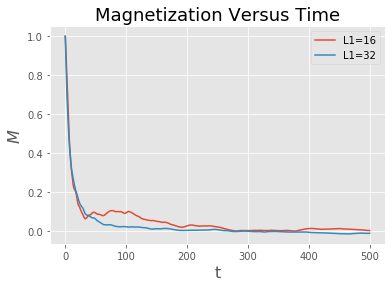

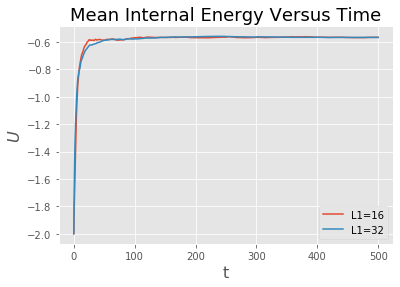

In [ ]:
t = 500
L1 = 16
L2 = 32
temp = 4

E1, E2_1, S1, S2_1 = two_dim_ising(L1, temp, L1*L1*t, output_type='array')
E2, E2_2, S2, S2_2 = two_dim_ising(L2, temp, L2*L2*t, output_type='array')

M1 = 1/L1**2 * S1
M2 = 1/L2**2 * S2

plt.figure()
plt.plot(np.linspace(0, t, len(M1)), M1, label='L1=16')
plt.plot(np.linspace(0, t, len(M2)), M2, label='L1=32')
#plt.axhline((1-np.sinh(2/temp)**(-4))**(1/8))
plt.title('Magnetization Versus Time', fontsize = 18)
plt.ylabel('$M$', fontsize = 16)
plt.xlabel('t', fontsize= 16)
plt.legend()


U1 = 1/L1**2 * E1
U2 = 1/L2**2 * E2
plt.figure()
plt.plot(np.linspace(0, t, len(U1)), U1, label='L1=16')
plt.plot(np.linspace(0, t, len(U2)), U2, label='L1=32')
plt.title('Mean Internal Energy Versus Time', fontsize = 18)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('t', fontsize= 16)
plt.legend()

# Magnetization Curves for Different Lattice Sizes
As a further check on the validity of our MCMC simulation of the Ising model, we calculate the magnetization as a function of temperature to try reproducing Onsager's exact solution. We actually did the opposite of what was suggested in the project description. Because our 2d Ising code initiallizes to all spin up, we started at low temperature and slowly increased the temperature, feeding the final spin state of the system at one temperature as the initial spin state at the next temperature. As can be seen in our plot, we were able to pretty nearly reproduce the analytical solution.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


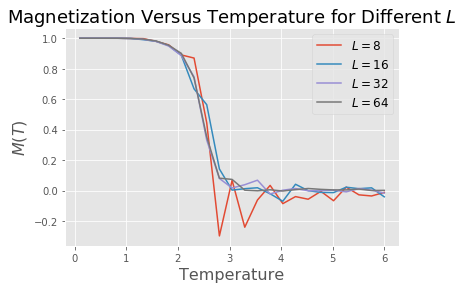

In [ ]:
n = 25
lattice = [8, 16, 32, 64] 
temps_arr = np.linspace(0.1, 6, n)

def f(L):
  Mnum = []
  spin = np.ones(L**2).reshape(L, L)
  for t in temps_arr:
    E, E2, S, S2, spin = two_dim_ising(L, t, 70*L*L, output_spin = True, spins = spin)
    Mnum = np.append(Mnum, 1/L**2 * S)
  return Mnum

for i, size in enumerate(lattice):
  plt.plot(temps_arr, f(size)) 
  plt.title('Magnetization Versus Temperature for Different $L$', fontsize=18)
  plt.legend([r'$L = 8$', r'$L = 16$', r'$L = 32$', r'$L = 64$'], fontsize=12)
  plt.xlabel('Temperature', fontsize=16)
  plt.ylabel('$M(T)$', fontsize=16)

# Typical Spin Configuration at Different Temperatures
We also examined the spin state of the system after it reached thermal equilibrium for temperatures above, at, and below the critical temperature. At temperatures above the critical temperature, we see more or less random assortment of spin up (grey)and spin down (teal). At the critcal temperature, we see that the spin up states begin to dominate, and the spin down states seem to be clumping together. Finally, when the system is cooled to well below the critical temperature, we see nearly all spin up states with very few spin down.l

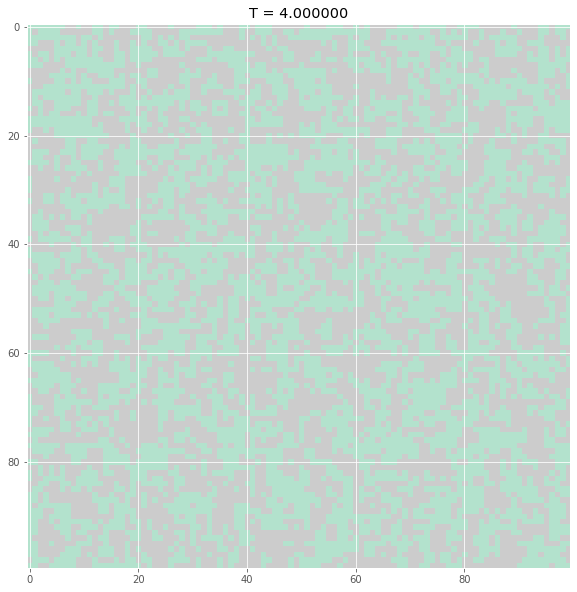

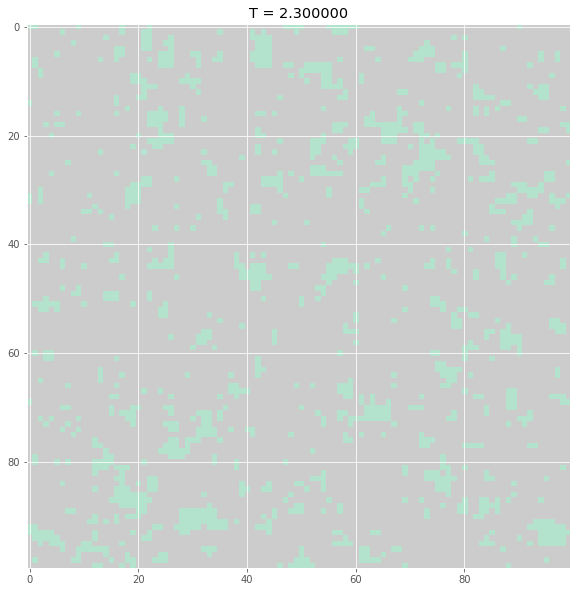

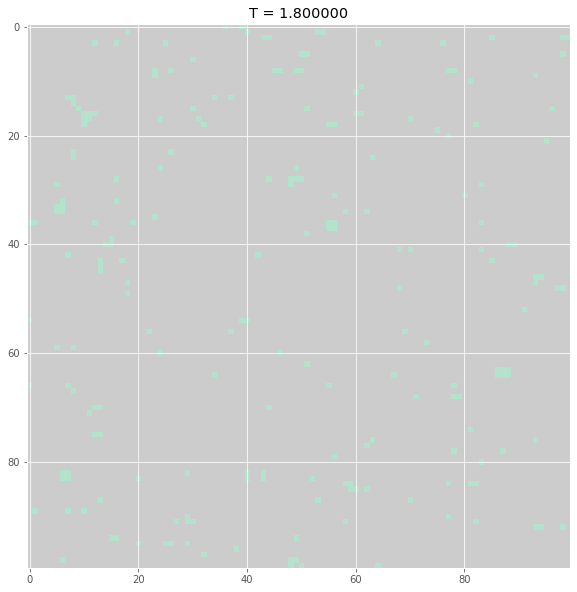

In [ ]:
L = 100
temps = np.array([4, 2.3, 1.8])

for t in temps:
  E, E2, S, S2, spin = two_dim_ising(L, t, 90*L*L, output_spin = True)
  plt.figure(figsize = (10, 10))
  plt.title('T = %f' %t)
  plt.imshow(spin, cmap='Pastel2')

#Case with a Nonzero External Magnetic Field
In the code cell below, we applied different magnetic fields of magnitude -1, 0, 1. For H = -1, we started our spin configuration to spin down, and for H = 1 we started our spin configuration to spin up. We then plotted and observed the behavior of the graph. From the graph, we can see that when we apply a magnetic field the phase transition is less dramatic. We believe this is due to the spins starting aligned with the magnetic field, but due to thermal excitation their spin configuartion changes but more slowly. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


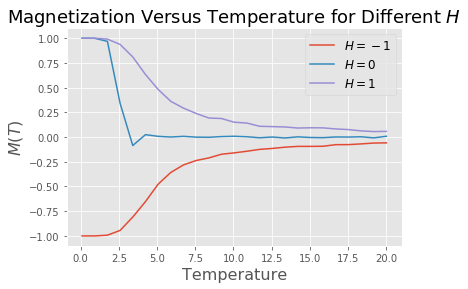

In [ ]:
Hs= [-1,0, 1]
n = 25
L = 32 
temps_arr = np.linspace(0.1,20, n)

def diff_mag(h):
  Mnum = []
  if h >= 0:
    spin = np.ones(L**2).reshape(L, L)
  else:
    spin = -np.ones(L**2).reshape(L, L)
  for t in temps_arr:
    E, E2, S, S2, spin = two_dim_ising(L, t, 70*L*L, H = h, output_spin = True, spins = spin)
    Mnum = np.append(Mnum, 1/L**2 * S)
  return Mnum

for i, h in enumerate(Hs):
  plt.plot(temps_arr, diff_mag(h)) 
  plt.title('Magnetization Versus Temperature for Different $H$', fontsize=18)
  plt.legend([r'$H = -1$', r'$H = 0$', r'$H = 1$'], fontsize=12)
  plt.xlabel('Temperature (K)', fontsize=16)
  plt.ylabel('$M(T)$', fontsize=16)

# Plot of $U$, $M$, $\chi_T$, and $C_H$ as functions of temperature
In the low temperature limit, the spins are uniform but during th ephase transition we see dramatic spikes for both $\chi_T$, and $C_H$ and then as we increase the temperature, since $\chi_T$, and $C_H$ are proportional to 1/$T$ and 1/$T^2$ respectively, they decay to zero. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


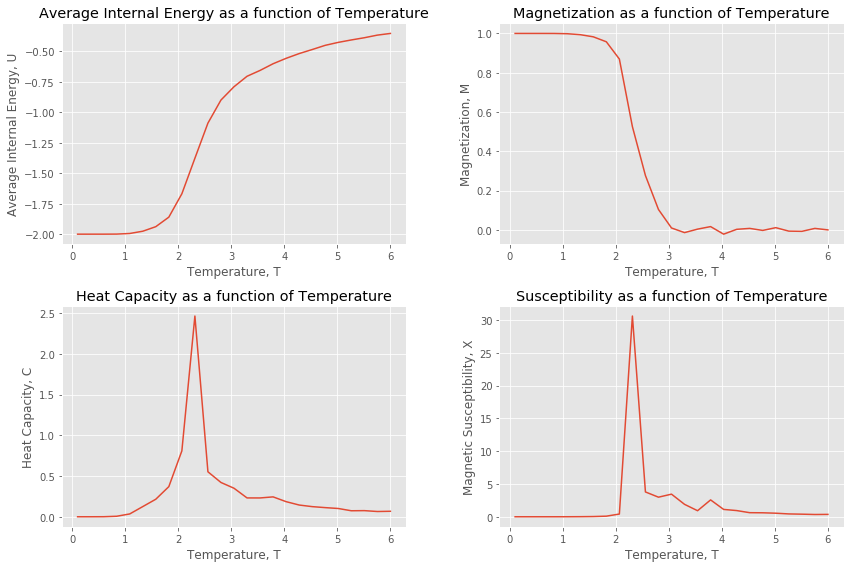

In [ ]:
n = 25 
L = 32
temps_arr = np.linspace(0.1, 6, n)

Unum = []
Mnum = []
Cnum = []
Xnum = []

spin = np.ones(L**2).reshape(L, L)
for t in temps_arr:
  E, E2, S, S2, spin = two_dim_ising(L, t, 200*L*L, output_spin = True, spins = spin)
  Unum = np.append(Unum, 1/L**2 * E)
  Mnum = np.append(Mnum, 1/L**2 * S)
  Cnum = np.append(Cnum, 1/(t**2*L**2) * (E2 - E**2))
  Xnum = np.append(Xnum, 1/(t*L**2) * (S2 - S**2))

fig, ax = plt.subplots(2,2, figsize = (12,8)) 
ax[0][0].plot(temps_arr, Unum)
ax[0][0].set_title('Average Internal Energy as a function of Temperature')
ax[0][0].set_xlabel('Temperature, T')
ax[0][0].set_ylabel('Average Internal Energy, U')
ax[0][1].plot(temps_arr, Mnum)
ax[0][1].set_title('Magnetization as a function of Temperature')
ax[0][1].set_xlabel('Temperature, T')
ax[0][1].set_ylabel('Magnetization, M')
ax[1][0].plot(temps_arr, Cnum)
ax[1][0].set_title('Heat Capacity as a function of Temperature')
ax[1][0].set_xlabel('Temperature, T')
ax[1][0].set_ylabel('Heat Capacity, C')
ax[1][1].plot(temps_arr, Xnum)
ax[1][1].set_title('Susceptibility as a function of Temperature')
ax[1][1].set_xlabel('Temperature, T')
ax[1][1].set_ylabel('Magnetic Susceptibility, X')
fig.tight_layout()